In [1]:
# Author: yg2170

In [2]:
import pandas as pd
pd.options.display.max_rows = 70
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

1. load data from disk

In [3]:
df_sh = pd.read_csv('Shanghai previous year data.csv')
df_sh.head(5)

,Number of family members,Income,Has child under 6 years old,review
0,2,106766,1,"""June is not the month to attend but we didn't..."
1,3,65315,1,"""Hong Kong is easy to get to via the MTR from ..."
2,3,65436,0,"""We stayed in Newport Bay, we took Admirals fl..."
3,4,70858,1,"""I was a chaperone for 8 middle school girls a..."
4,5,61970,0,"""Watching your Grand Daughter's eyes fill with..."


In [4]:
df_par = pd.read_csv('Paris historical data with FastPass.csv')
df_par.head(5)

,Number of family members,Income,Has child under 6 years old,Buy fast pass,review,Number of annual visits,Merchandise Spend
0,2,98148,1,1,"""My husband and I had a magical time in Disney...",3,50.65
1,1,44429,1,0,"""The Disneyland park is as magical and excitIm...",3,21.74
2,5,68310,1,0,"""I was so excited to go to Disneyland and it d...",4,28.69
3,5,71760,0,0,"""Disneyland reviews have been done and overdon...",3,35.64
4,1,86769,1,1,"""What could ever top Disneyland? Theme park pe...",4,50.56


In [5]:
print('---------shanghai-----------')
print(df_sh.describe())
print('---------pris-----------')
print(df_par.describe())

---------shanghai-----------
       Number of family members         Income  Has child under 6 years old
count               8800.000000    8800.000000                  8800.000000
mean                   2.662727   80077.249318                     0.734545
std                    1.560281   20328.654183                     0.441600
min                    1.000000   38053.000000                     0.000000
25%                    1.000000   63754.500000                     0.000000
50%                    2.000000   74936.500000                     1.000000
75%                    4.000000   99339.500000                     1.000000
max                    7.000000  126078.000000                     1.000000
---------pris-----------
       Number of family members         Income  Has child under 6 years old  \
count              13200.000000   13200.000000                 13200.000000   
mean                   2.646061   80138.785985                     0.734697   
std                    1.

# SectionI. Fastpass Prediction



We want to use machine learning to figure out which kind of people are more likely to buy fastpass.

In [6]:
# Do the data split
from sklearn.model_selection import train_test_split as tr_te_split
from sklearn.model_selection import GridSearchCV
X_par = df_par[['Number of family members', 'Income', 'Has child under 6 years old']]
y_par = df_par['Buy fast pass']
 
X_train, X_test, y_train, y_test = tr_te_split(X_par, y_par, test_size=0.3, random_state=0)
for col in X_train.columns:
    print(col)
    if col == "Income" or col == 'Number of family members':
        print(col)
        mean = X_train.mean()[col]
        std = X_train.std()[col]
        X_train[col] = (X_train[col] - mean) / std
        X_test[col] = (X_test[col] - mean) / std


Number of family members
Number of family members
Income
Income
Has child under 6 years old


In [7]:
X_train

,Number of family members,Income,Has child under 6 years old
10918,-1.061346,-1.489097,0
1361,0.867489,-0.689411,0
6260,-0.418401,1.547719,0
10848,-0.418401,1.370614,1
4014,1.510433,-0.393622,1
...,...,...,...
13123,0.224544,-0.403276,1
3264,0.224544,-0.801725,0
9845,0.224544,-1.102590,0
10799,-1.061346,0.708422,1


The score of training set is: 0.798051948051948
The score of testing set is: 0.7825757575757576


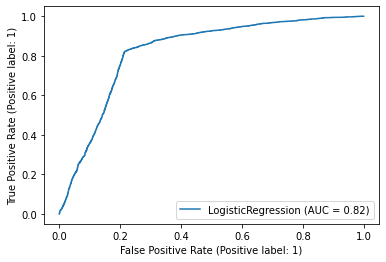

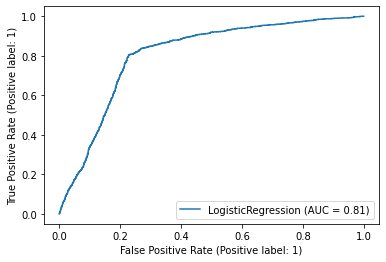

In [8]:
# model 1: logestic regression
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

plot_roc_curve(logit, X_train, y_train)
print("The score of training set is:", logit.score(X_train, y_train))
plot_roc_curve(logit, X_test, y_test)
print("The score of testing set is:", logit.score(X_test, y_test))

The optimal max_depth should be 4
The score of training set is: 0.8005411255411256
The score of testing set is: 0.7840909090909091


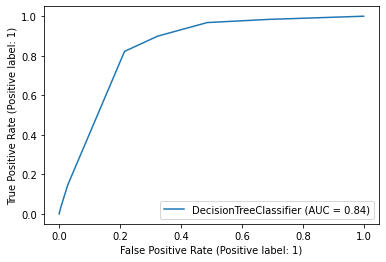

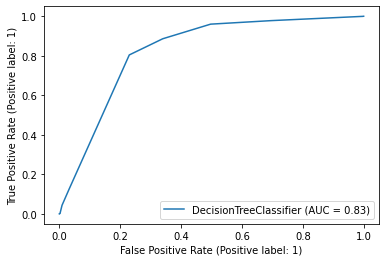

In [9]:
# model 2: decision tree

# find the optimal parameters


# for i in range(1,6):
#     print(i)
#     dtc = DecisionTreeClassifier(max_depth = i)
#     dtc.fit(X_train, y_train)
#     plot_roc_curve(dtc, X_train, y_train)
#     print("The score of training set is:", dtc.score(X_train, y_train))
#     plot_roc_curve(dtc, X_test, y_test)
#     print("The score of testing set is:", dtc.score(X_test, y_test))

print("The optimal max_depth should be 4")
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(X_train, y_train)
plot_roc_curve(dtc, X_train, y_train)
print("The score of training set is:", dtc.score(X_train, y_train))
plot_roc_curve(dtc, X_test, y_test)
print("The score of testing set is:", dtc.score(X_test, y_test))

The score of training set is: 0.8005411255411256
The score of testing set is: 0.7838383838383839


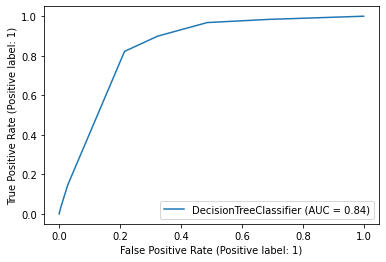

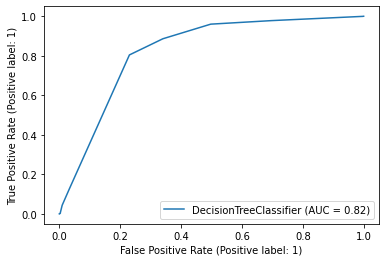

In [10]:
#  model 3: Radom Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

dtc.fit(X_train, y_train)
plot_roc_curve(dtc, X_train, y_train)
print("The score of training set is:", dtc.score(X_train, y_train))
plot_roc_curve(dtc, X_test, y_test)
print("The score of testing set is:", dtc.score(X_test, y_test))

In [11]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': range(30,50,10),'max_depth':range(1,6,1),
              'min_samples_leaf':[5,6],'max_features':[1,2,3]}

grid_rfc = GridSearchCV(rfc,parameters,scoring='roc_auc')

grid_rfc.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 6), 'max_features': [1, 2, 3],
                         'min_samples_leaf': [5, 6],
                         'n_estimators': range(30, 50, 10)},
             scoring='roc_auc')

The score of training set is: 0.8602928497928755
The score of testing set is: 0.8312419041344095


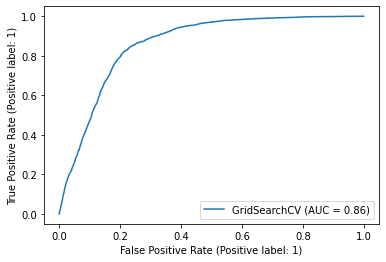

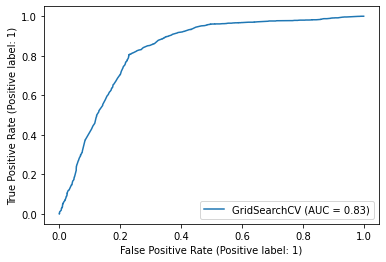

In [12]:
plot_roc_curve(grid_rfc, X_train, y_train)
print("The score of training set is:", grid_rfc.score(X_train, y_train))
plot_roc_curve(grid_rfc, X_test, y_test)
print("The score of testing set is:", grid_rfc.score(X_test, y_test))

The score of training set is: 0.7982683982683982
The score of testing set is: 0.7833333333333333


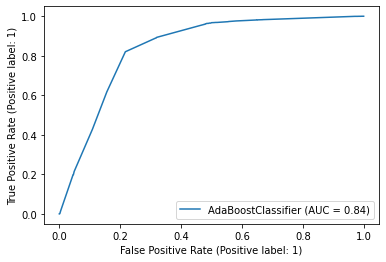

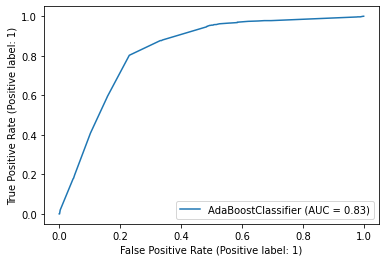

In [13]:
# model 4: Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME',n_estimators=300,learning_rate=0.8)
ada.fit(X_train, y_train)
plot_roc_curve(ada, X_train, y_train)
print("The score of training set is:", ada.score(X_train, y_train))
plot_roc_curve(ada, X_test, y_test)
print("The score of testing set is:", ada.score(X_test, y_test))

In [14]:
ada = AdaBoostClassifier()
parameters = {'n_estimators': range(200,450,50),
              'learning_rate': [0.01,0.1,0.2,0.5,0.8]}

grid_ada = GridSearchCV(ada,parameters,scoring='roc_auc')

grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8],
                         'n_estimators': range(200, 450, 50)},
             scoring='roc_auc')

The score of training set is: 0.8468258415902072
The score of testing set is: 0.8279204084994236


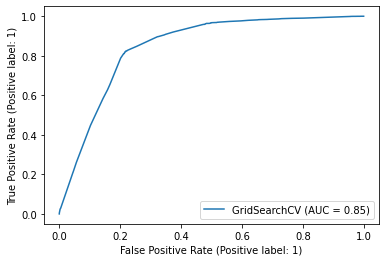

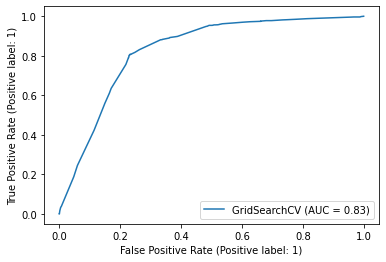

In [15]:
plot_roc_curve(grid_ada, X_train, y_train)
print("The score of training set is:", grid_ada.score(X_train, y_train))
plot_roc_curve(grid_ada, X_test, y_test)
print("The score of testing set is:", grid_ada.score(X_test, y_test))

In [16]:
# We found that the adaboost tree can provide the highest AUC.
# We use this model to predict which people in sh will buy fastpass

In [17]:
df_sh_x = df_sh[['Number of family members', 'Income', 'Has child under 6 years old']]

for col in df_sh_x.columns:
    if col == "Income" or col == 'Number of family members':
        mean = df_sh_x.mean()[col]
        std = df_sh_x.std()[col]
        df_sh_x[col] = (df_sh_x[col] - mean) / std
        
        
df_sh_x 

,Number of family members,Income,Has child under 6 years old
0,-0.424749,1.312864,1
1,0.216161,-0.726179,1
2,0.216161,-0.720227,0
3,0.857071,-0.453510,1
4,1.497981,-0.890725,0
...,...,...,...
8795,-1.065659,0.255735,1
8796,-1.065659,0.895276,1
8797,-0.424749,-1.238314,0
8798,-0.424749,1.054214,1


In [18]:
y = grid_ada.predict(df_sh_x)
y

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
df_sh['Buy fast pass ada'] = y

In [20]:
df_sh.describe()

,Number of family members,Income,Has child under 6 years old,Buy fast pass ada
count,8800.000000,8800.000000,8800.000000,8800.000000
mean,2.662727,80077.249318,0.734545,0.465682
std,1.560281,20328.654183,0.441600,0.498849
min,1.000000,38053.000000,0.000000,0.000000
25%,1.000000,63754.500000,0.000000,0.000000
50%,2.000000,74936.500000,1.000000,0.000000
75%,4.000000,99339.500000,1.000000,1.000000
max,7.000000,126078.000000,1.000000,1.000000


In [21]:
# df_sh.to_csv('sh_ada.csv')

# Section II. Review Evaluation

In [22]:
# Paris review evaluation

In [23]:
sia_model = SentimentIntensityAnalyzer()
sia_scores = list()

for obs in df_par['review']:
    sia_scores.append(sia_model.polarity_scores(obs))
y_par_predictions_score = [s['compound'] for s in sia_scores]
y_par_predictions_test_data = ["positive" if (s['compound'] >= 0) else "negative" for s in sia_scores]

In [24]:
 y_par_predictions_score

[0.962,
 0.9779,
 0.986,
 0.93,
 0.8381,
 0.6247,
 -0.5166,
 0.4404,
 0.2225,
 0.9517,
 -0.6801,
 0.8934,
 0.988,
 0.4389,
 0.9362,
 0.9167,
 0.969,
 0.9992,
 0.9822,
 0.9454,
 0.9233,
 0.9965,
 0.9901,
 0.9959,
 0.2944,
 0.9884,
 -0.567,
 0.8402,
 0.8807,
 0.9874,
 0.3285,
 -0.2263,
 0.6249,
 0.9315,
 0.9916,
 0.9117,
 0.893,
 -0.1945,
 0.4215,
 0.8241,
 0.9895,
 0.8864,
 0.987,
 0.9294,
 0.0717,
 0.986,
 0.9757,
 0.9349,
 -0.2462,
 0.9413,
 0.9434,
 -0.8565,
 0.802,
 0.9889,
 0.9698,
 -0.4691,
 0.9148,
 0.9286,
 0.9818,
 0.1027,
 0.0,
 0.8615,
 -0.7549,
 -0.7021,
 0.8735,
 -0.845,
 0.9592,
 0.9808,
 0.9239,
 0.9503,
 0.9787,
 0.8316,
 0.9966,
 0.9958,
 0.9623,
 0.7789,
 0.9901,
 0.2732,
 0.9959,
 0.6364,
 -0.5028,
 0.9832,
 0.6374,
 -0.508,
 0.1027,
 0.9159,
 0.8652,
 0.9784,
 0.8752,
 0.877,
 -0.1655,
 0.9669,
 0.4588,
 0.843,
 -0.7345,
 0.9085,
 0.7572,
 0.939,
 0.9158,
 0.9966,
 0.9456,
 0.8888,
 0.6808,
 -0.2023,
 0.9444,
 -0.1984,
 0.9238,
 0.985,
 0.9854,
 0.7465,
 0.9633,
 0.8

In [25]:
df_par['sentiment intensity'] = y_par_predictions_score
df_par['sentiment'] = y_par_predictions_test_data
df_par

,Number of family members,Income,Has child under 6 years old,Buy fast pass,review,Number of annual visits,Merchandise Spend,sentiment intensity,sentiment
0,2,98148,1,1,"""My husband and I had a magical time in Disney...",3,50.65,0.9620,positive
1,1,44429,1,0,"""The Disneyland park is as magical and excitIm...",3,21.74,0.9779,positive
2,5,68310,1,0,"""I was so excited to go to Disneyland and it d...",4,28.69,0.9860,positive
3,5,71760,0,0,"""Disneyland reviews have been done and overdon...",3,35.64,0.9300,positive
4,1,86769,1,1,"""What could ever top Disneyland? Theme park pe...",4,50.56,0.8381,positive
...,...,...,...,...,...,...,...,...,...
13195,3,71968,1,0,"""Literally the most amazing day at Disneyland ...",3,32.02,0.9480,positive
13196,2,116794,1,0,"""This was our first time going to Disneyland a...",3,52.16,0.9833,positive
13197,5,72623,0,0,"""We are frequent visitors to Disneyland going ...",3,23.88,0.9934,positive
13198,1,54980,1,0,"""I need to say I have been to home of Disne...",1,34.13,-0.7364,negative


In [26]:
# Shanghai review evaluation

In [27]:
sia_model = SentimentIntensityAnalyzer()
sia_scores = list()

for obs in df_sh['review']:
    sia_scores.append(sia_model.polarity_scores(obs))
y_sh_predictions_score = [s['compound'] for s in sia_scores]
y_sh_predictions = ["positive" if (s['compound'] >= 0) else "negative" for s in sia_scores]

In [28]:
df_sh['sentiment intensity'] = y_sh_predictions_score
df_sh['sentiment'] = y_sh_predictions
df_sh

,Number of family members,Income,Has child under 6 years old,review,Buy fast pass ada,sentiment intensity,sentiment
0,2,106766,1,"""June is not the month to attend but we didn't...",1,0.6124,positive
1,3,65315,1,"""Hong Kong is easy to get to via the MTR from ...",0,0.9873,positive
2,3,65436,0,"""We stayed in Newport Bay, we took Admirals fl...",0,-0.9084,negative
3,4,70858,1,"""I was a chaperone for 8 middle school girls a...",0,0.9769,positive
4,5,61970,0,"""Watching your Grand Daughter's eyes fill with...",0,0.9368,positive
...,...,...,...,...,...,...,...
8795,1,85276,1,I love Disney! It was and is amazing! Unfortun...,1,0.6341,positive
8796,1,98277,1,"""We purchased the tickets in advance from Tast...",1,0.9745,positive
8797,2,54904,0,"""We took out 4 year old granddaughter and she ...",0,-0.1424,negative
8798,2,101508,1,"""That's basically what we did: we paid to stan...",1,-0.6415,negative


In [29]:
# df_sh.to_csv('sh_nlp.csv')
# df_par.to_csv('par_nlp.csv')


# Section III.  Merchandise Spend Prediction

We use t-test to find which attributes can significantly impact Merchandise Spend.
We find that num of members, income, children under 6 and buy fast pass can be used as input variables.

In [30]:
# Model 1: Liner regression
from sklearn.linear_model import  LinearRegression
from sklearn import  metrics


X_par = df_par[['Number of family members', 'Income', 'Has child under 6 years old','Buy fast pass']]
y_par = df_par['Merchandise Spend']
 
X_train, X_test, y_train, y_test = tr_te_split(X_par, y_par, test_size=0.3, random_state=0)
# for col in X_train.columns:

#     if col == "Income" or col == 'Number of family members':
#         mean = X_train.mean()[col]
#         std = X_train.std()[col]
#         X_train[col] = (X_train[col] - mean) / std
#         X_test[col] = (X_test[col] - mean) / std

c:\users\27161\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


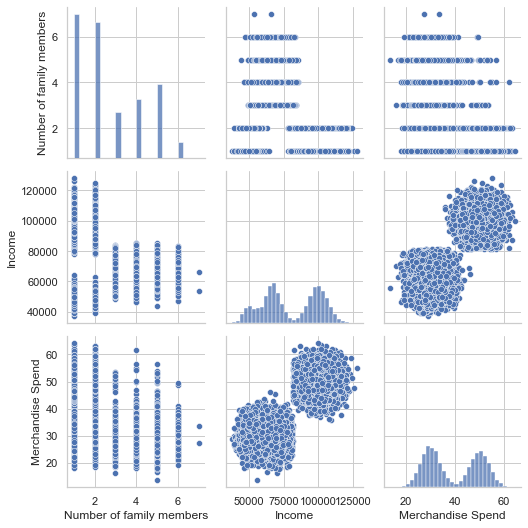

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid' , context = 'notebook')
cols = ['Number of family members', 'Income','Merchandise Spend']

sns.pairplot(df_par[cols] , size = 2.5)
plt.tight_layout()
plt.show()

In [32]:
X_train

,Number of family members,Income,Has child under 6 years old,Buy fast pass
10918,1,50145,0,0
1361,4,66215,0,0
6260,2,111171,0,1
10848,2,107612,1,0
4014,5,72159,1,0
...,...,...,...,...
13123,3,71965,1,0
3264,3,63958,0,1
9845,3,57912,0,1
10799,1,94305,1,1


In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_predict_train= lr.predict(X_train)
lr_y_predict_test = lr.predict(X_test)
lr_w = lr.coef_  
lr_b = lr.intercept_ 


In [34]:

print('R^2 train: %.3f, test: %.3f' % (
        metrics.r2_score(y_train, lr_y_predict_train),
        metrics.r2_score(y_test, lr_y_predict_test)))
print('MSE train: %.3f, test: %.3f' % (
        metrics.mean_squared_error(y_train, lr_y_predict_train),
        metrics.mean_squared_error(y_test, lr_y_predict_test)))


R^2 train: 0.783, test: 0.790
MSE train: 24.889, test: 24.127


In [35]:
# Model 2: Lasso regression 
# Since the scale of income and #family members are not consist. We guess it might be useful if we add some regularization term

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
ls_y_pred_train = lasso.predict(X_train)
ls_y_pred_test = lasso.predict(X_test)
ls_w = lasso.coef_  
ls_b = lasso.intercept_ 

In [37]:
print('MSE train: %.3f, test: %.3f' % (
        metrics.mean_squared_error(y_train, ls_y_pred_train),
        metrics.mean_squared_error(y_test, ls_y_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
       metrics.r2_score(y_train, ls_y_pred_train),
        metrics.r2_score(y_test, ls_y_pred_test)))

MSE train: 24.961, test: 24.157
R^2 train: 0.783, test: 0.790


In [38]:
# Model 3: Polynomial regression 
# We found that in the previous 2 models, test proformance is always better than the training proforamnce.
# Which means our model is underfitted. So we decide to add some complexity.

In [39]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,10):
    print(i)
    pr = LinearRegression()
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    pr.fit(X_train_poly, y_train)
    pr_y_pred_train = pr.predict(poly.fit_transform(X_train))
    pr_y_pred_test = pr.predict(poly.fit_transform(X_test))
    pr_w = lasso.coef_  
    pr_b = lasso.intercept_ 
    print('MSE train: %.3f, test: %.3f' % (
            metrics.mean_squared_error(y_train, pr_y_pred_train),
            metrics.mean_squared_error(y_test, pr_y_pred_test)))
    print('R^2 train: %.3f, test: %.3f' % (
           metrics.r2_score(y_train, pr_y_pred_train),
            metrics.r2_score(y_test, pr_y_pred_test)))
#     The optimal degree should be 3.

2
MSE train: 24.405, test: 23.600
R^2 train: 0.788, test: 0.795
3
MSE train: 19.592, test: 19.422
R^2 train: 0.830, test: 0.831
4
MSE train: 19.806, test: 19.681
R^2 train: 0.828, test: 0.829
5
MSE train: 19.896, test: 19.708
R^2 train: 0.827, test: 0.829
6
MSE train: 20.134, test: 19.950
R^2 train: 0.825, test: 0.827
7
MSE train: 20.417, test: 20.293
R^2 train: 0.822, test: 0.824
8
MSE train: 22.378, test: 22.291
R^2 train: 0.805, test: 0.806
9
MSE train: 36.665, test: 38.002
R^2 train: 0.681, test: 0.670


In [40]:
pr = LinearRegression()
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
pr.fit(X_train_poly, y_train)
pr_y_pred_train = pr.predict(poly.fit_transform(X_train))
pr_y_pred_test = pr.predict(poly.fit_transform(X_test))

print('MSE train: %.3f, test: %.3f' % (
            metrics.mean_squared_error(y_train, pr_y_pred_train),
            metrics.mean_squared_error(y_test, pr_y_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
           metrics.r2_score(y_train, pr_y_pred_train),
            metrics.r2_score(y_test, pr_y_pred_test)))

MSE train: 19.592, test: 19.422
R^2 train: 0.830, test: 0.831


In [41]:
df_sh

,Number of family members,Income,Has child under 6 years old,review,Buy fast pass ada,sentiment intensity,sentiment
0,2,106766,1,"""June is not the month to attend but we didn't...",1,0.6124,positive
1,3,65315,1,"""Hong Kong is easy to get to via the MTR from ...",0,0.9873,positive
2,3,65436,0,"""We stayed in Newport Bay, we took Admirals fl...",0,-0.9084,negative
3,4,70858,1,"""I was a chaperone for 8 middle school girls a...",0,0.9769,positive
4,5,61970,0,"""Watching your Grand Daughter's eyes fill with...",0,0.9368,positive
...,...,...,...,...,...,...,...
8795,1,85276,1,I love Disney! It was and is amazing! Unfortun...,1,0.6341,positive
8796,1,98277,1,"""We purchased the tickets in advance from Tast...",1,0.9745,positive
8797,2,54904,0,"""We took out 4 year old granddaughter and she ...",0,-0.1424,negative
8798,2,101508,1,"""That's basically what we did: we paid to stan...",1,-0.6415,negative


In [42]:
pr_pred = pr.predict(poly.fit_transform(df_sh[['Number of family members', 'Income', 'Has child under 6 years old','Buy fast pass ada']]))
pr_pred

array([50.92548503, 30.17518402, 30.19075647, ..., 28.93200774,
       50.47292369, 50.95817325])

In [43]:
df_sh['Merchandise Spend pr'] = pr_pred
df_sh

,Number of family members,Income,Has child under 6 years old,review,Buy fast pass ada,sentiment intensity,sentiment,Merchandise Spend pr
0,2,106766,1,"""June is not the month to attend but we didn't...",1,0.6124,positive,50.925485
1,3,65315,1,"""Hong Kong is easy to get to via the MTR from ...",0,0.9873,positive,30.175184
2,3,65436,0,"""We stayed in Newport Bay, we took Admirals fl...",0,-0.9084,negative,30.190756
3,4,70858,1,"""I was a chaperone for 8 middle school girls a...",0,0.9769,positive,30.722793
4,5,61970,0,"""Watching your Grand Daughter's eyes fill with...",0,0.9368,positive,29.320104
...,...,...,...,...,...,...,...,...
8795,1,85276,1,I love Disney! It was and is amazing! Unfortun...,1,0.6341,positive,46.367826
8796,1,98277,1,"""We purchased the tickets in advance from Tast...",1,0.9745,positive,50.681068
8797,2,54904,0,"""We took out 4 year old granddaughter and she ...",0,-0.1424,negative,28.932008
8798,2,101508,1,"""That's basically what we did: we paid to stan...",1,-0.6415,negative,50.472924


In [44]:
df_sh.describe()

,Number of family members,Income,Has child under 6 years old,Buy fast pass ada,sentiment intensity,Merchandise Spend pr
count,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000
mean,2.662727,80077.249318,0.734545,0.465682,0.686380,39.230961
std,1.560281,20328.654183,0.441600,0.498849,0.471391,9.870430
min,1.000000,38053.000000,0.000000,0.000000,-0.993300,27.843970
25%,1.000000,63754.500000,0.000000,0.000000,0.648600,29.654070
50%,2.000000,74936.500000,1.000000,0.000000,0.895700,32.846466
75%,4.000000,99339.500000,1.000000,1.000000,0.966100,50.202927
max,7.000000,126078.000000,1.000000,1.000000,0.999900,51.225769


# Section IV.  Number of annual visits Prediction

In [45]:
# Model 1: logistic regression
X_par = df_par[['Number of family members', 'Income', 'Has child under 6 years old', 'sentiment intensity']]
y_par = df_par['Number of annual visits']
 
X_train, X_test, y_train, y_test = tr_te_split(X_par, y_par, test_size=0.3, random_state=0)


In [46]:
# model 1: decision tree

# find the optimal parameters
from sklearn.model_selection import cross_val_score

# for i in range(3,10):
#     print(i)
#     dtc = DecisionTreeClassifier(max_depth = i)
#     na_dtc = dtc.fit(X_train, y_train)
#     print("The score of training set is:",cross_val_score(na_dtc, X_train, y_train, cv=10).mean())

print("The optimal max_depth should be 3")    
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)
dtc_y_train_predict = dtc.predict(X_train)
dtc_y_test_predict = dtc.predict(X_test)
print("The score of training set is:",cross_val_score(dtc, X_train, y_train, cv=10).mean())
dtc_y_test_predict

The optimal max_depth should be 3
The score of training set is: 0.6251082251082251


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [47]:
from sklearn import tree

In [50]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=0).fit(iris.data, iris.target)
iris.feature_names

# tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

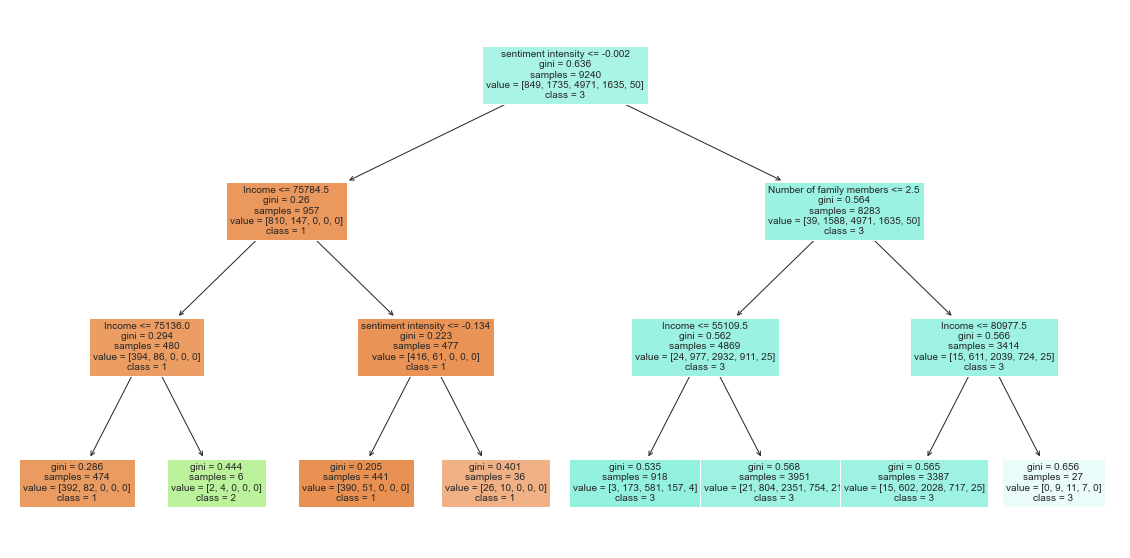

In [52]:
fig, _ = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
tree.plot_tree(dtc, filled=True,
               feature_names=['Number of family members', 'Income', 'Has child under 6 years old', 'sentiment intensity'],
               class_names=[str(i) for i in dtc.classes_], fontsize=10)
plt.show()

In [ ]:
y_train.value_counts()

In [ ]:
# model2: knn
from sklearn.neighbors import KNeighborsClassifier 
for col in X_train.columns:

    if col == "Income" or col == 'Number of family members' or col == 'sentiment intensity':
        mean = X_train.mean()[col]
        std = X_train.std()[col]
        X_train[col] = (X_train[col] - mean) / std
        X_test[col] = (X_test[col] - mean) / std

# for i in range(40,120,5):
#     print(i)
#     knn = KNeighborsClassifier(n_neighbors=i) 
#     knn.fit(X_train, y_train) 
#     knn_y_train_predict = knn.predict(X_train)
#     knn_y_test_predict = knn.predict(X_test)
#     print("The score of training set is:",cross_val_score(knn, X_train, y_train, cv=10).mean())
    
knn = KNeighborsClassifier(n_neighbors=70) 
knn.fit(X_train, y_train) 
knn_y_train_predict = knn.predict(X_train)
knn_y_test_predict = knn.predict(X_test)
print("The score of training set is:",cross_val_score(knn, X_train, y_train, cv=10).mean())


In [ ]:
# model 3: linear regression
X_train, X_test, y_train, y_test = tr_te_split(X_par, y_par, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred_train = lr.predict(X_train)
lr_y_pred_train = lr_y_pred_train.round()
lr_y_pred_test = lr.predict(X_test)




In [ ]:
lr_y_pred_train

In [ ]:

print('Decision Tree')

print('MSE train: %.3f, test: %.3f' % (
            metrics.mean_squared_error(y_train, dtc_y_train_predict),
            metrics.mean_squared_error(y_test, dtc_y_test_predict)))
print('R^2 train: %.3f, test: %.3f' % (
           metrics.r2_score(y_train, dtc_y_train_predict),
            metrics.r2_score(y_test, dtc_y_test_predict)))

print('KNN')
print('MSE train: %.3f, test: %.3f' % (
            metrics.mean_squared_error(y_train, knn_y_train_predict),
            metrics.mean_squared_error(y_test, knn_y_test_predict)))
print('R^2 train: %.3f, test: %.3f' % (
           metrics.r2_score(y_train, knn_y_train_predict),
            metrics.r2_score(y_test, knn_y_test_predict)))

print('Linear Regression')
print('MSE train: %.3f, test: %.3f' % (
            metrics.mean_squared_error(y_train, lr_y_pred_train),
            metrics.mean_squared_error(y_test, lr_y_pred_test)))
print('R^2 train: %.3f, test: %.3f' % (
           metrics.r2_score(y_train, lr_y_pred_train),
            metrics.r2_score(y_test, lr_y_pred_test)))

In [ ]:
# So we should choose Decision Tree

In [ ]:
X_par = df_par[['Number of family members', 'Income', 'Has child under 6 years old', 'sentiment intensity']]


In [ ]:
na_pred = dtc.predict(df_sh[['Number of family members', 'Income', 'Has child under 6 years old', 'sentiment intensity']])
print(na_pred.std())
print(na_pred.mean())

In [ ]:
df_sh['Number of annual visits dtc'] = na_pred

In [ ]:
df_sh

In [ ]:
df_sh['Number of annual visits dtc'].value_counts()

In [ ]:
df_sh_2 = df_sh



In [ ]:
df_sh_2['revenue'] = (df_sh_2['Number of annual visits dtc']*df_sh_2['Number of family members']*75+
df_sh_2['Number of annual visits dtc']*df_sh_2['Number of family members']*df_sh_2['Buy fast pass ada']*30+
df_sh_2['Number of annual visits dtc']*df_sh_2['Number of family members']*df_sh_2['Merchandise Spend pr'])

In [ ]:
df_sh_2

In [ ]:
df_sh_2.describe()

In [ ]:
df_sh_3 = df_sh

In [ ]:
df_sh_3['revenue'] = (df_sh_3['Number of annual visits dtc']*df_sh_3['Number of family members']*75+
df_sh_3['Number of annual visits dtc']*df_sh_3['Number of family members']*df_sh_3['Buy fast pass ada']*30+
df_sh_3['Number of annual visits dtc']*df_sh_3['Merchandise Spend pr'])

In [ ]:
df_sh_3.describe()

In [ ]:
df_sh_2.to_csv('sh_2.csv')
df_sh_3.to_csv('sh_3.csv')
